In [4]:
import sys
sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Misyak')
sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Misyak/eval')
sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Misyak/simulations')
import numpy as np
import pandas as pd

from evaluateMisyak_FullExperimentalConditions import EvaluateOverloadedSignaler

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
humanResults = pd.read_pickle('/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Misyak/data/humanResultsStrategyPDFs.pkl')

tuneGrid8 = pd.read_pickle('./evalResults-2020-8-28-valueFixed1-cost01-signalCost.pkl')
tuneGrid9 = pd.read_pickle("./evalResults-2020-9-1-valueFixed1-cost01-signalCost-largerAlpha.pkl")
tuneGrid92 = pd.read_pickle("./evalResults-2020-9-2-alpha17-25.pkl")
tuneGrid828 = pd.concat([tuneGrid8, tuneGrid9,tuneGrid92])

rsaTG = pd.read_pickle('./evalResults-2020-9-1-RSA.pkl')

In [45]:
def getMatchingStrategies(modelPreds):
    indxNames = list(modelPreds.index.names)
    indxNames.remove('strategy')
    
    hStrat = modelPreds.groupby(indxNames).apply(lambda y: y['humanResults'].values.argmax())
    mStrat = modelPreds.groupby(indxNames).apply(lambda y: y['modelResults'].values.argmax())
    matches = (hStrat == mStrat).value_counts()
    #keyConditionMatches = (hStrat.loc[[(2, 2, 1, 2), (1, 2, 1, 2),(1,1,1,2), (1,2,0,2)]]==mStrat.loc[[(2, 2, 1, 2), (1, 2, 1, 2),(1,1,1,2), (1,2,0,2)]]).value_counts()
    
    keyConditionMatches = [hStrat.loc[(2, 2, 1, 2)]==mStrat.loc[(2, 2, 1, 2)], 
                       hStrat.loc[(1, 2, 1, 2)]==mStrat.loc[(1, 2, 1, 2)],
                       hStrat.loc[(1,1,1,2)]==mStrat.loc[(1,1,1,2)],
                       hStrat.loc[(1,2,0,2)]==mStrat.loc[(1,2,0,2)]]
    print(keyConditionMatches)
    return(matches, keyConditionMatches)

In [8]:
def getNMatches(dfRow):
    getModelingResults =  EvaluateOverloadedSignaler(humanResults, returnStrategyBreakdown = True)
    modelStrategyPDF = getModelingResults(alpha=dfRow.index.get_level_values('alpha')[0], 
                                      valueOfReward=dfRow.index.get_level_values('valueOfReward')[0], 
                                      signalMeaningPrior=dfRow.index.get_level_values('signalTypePriors')[0], 
                                      costOfSignal = 0, 
                                      costOfPunishment = 0)
    stratMatches = getMatchingStrategies(modelStrategyPDF)
    return(stratMatches)

# Best Parameters

Best parameters for the imaged we model

In [12]:
tuneGrid828.loc[tuneGrid828['keyConditionRMSE']<.115]

,,,,,keyConditionRMSE,keyConditionVariance,totalRMSE,totalVariance
alpha,signalTypePriors,valueOfReward,costOfNonReward,costOfSignal,,,,
9.0,0.55,1.0,0.5,0.0,0.113940,0.012982,0.306759,0.094101
10.0,0.55,1.0,0.5,0.0,0.112634,0.012686,0.301415,0.090851
11.0,0.55,1.0,0.5,0.0,0.112136,0.012575,0.296579,0.087959
12.0,0.55,1.0,0.5,0.0,0.112428,0.012640,0.292205,0.085384
13.0,0.55,1.0,0.5,0.0,0.113465,0.012874,0.288247,0.083087


In [41]:
byAlpha_tuneGrid = tuneGrid828.loc[(tuneGrid828.index.get_level_values('costOfNonReward') == 1.0) &
                                   (tuneGrid828.index.get_level_values('signalTypePriors') == .55) &
                                   (tuneGrid828.index.get_level_values('costOfSignal')==0)]

In [14]:
byAlpha_tuneGrid

,,,,,keyConditionRMSE,keyConditionVariance,totalRMSE,totalVariance
alpha,signalTypePriors,valueOfReward,costOfNonReward,costOfSignal,,,,
1.0,0.55,1.0,1.0,0.0,0.182928,0.033463,0.354347,0.125562
2.0,0.55,1.0,1.0,0.0,0.149434,0.022330,0.345808,0.119583
3.0,0.55,1.0,1.0,0.0,0.136316,0.018582,0.341344,0.116515
4.0,0.55,1.0,1.0,0.0,0.129914,0.016878,0.334698,0.112023
5.0,0.55,1.0,1.0,0.0,0.125186,0.015672,0.327161,0.107034
6.0,0.55,1.0,1.0,0.0,0.121533,0.014770,0.320100,0.102464
7.0,0.55,1.0,1.0,0.0,0.118986,0.014158,0.313972,0.098579
8.0,0.55,1.0,1.0,0.0,0.117610,0.013832,0.308799,0.095357
9.0,0.55,1.0,1.0,0.0,0.117422,0.013788,0.304464,0.092698


Best parameters for imagined we model applied to the rsa

In [ ]:
rsaByAlpha = rsaTG.loc[(rsaTG.index.get_level_values('costOfNonReward') == 1.0) &
                                   (rsaTG.index.get_level_values('signalTypePriors') == .55) &
                                   (rsaTG.index.get_level_values('costOfSignal')==0)]
rsaByAlpha

optimal rsa parameters directly to human data

In [ ]:
rsaTG.loc[rsaTG['keyConditionRMSE']<.096]

In [ ]:
rsaByAlphaO = rsaTG.loc[(rsaTG.index.get_level_values('costOfNonReward') == 1.0) &
                                   (rsaTG.index.get_level_values('signalTypePriors') == .625) &
                                   (rsaTG.index.get_level_values('costOfSignal')==0.1)]
rsaByAlphaO

In [9]:
rsaFixedParams = rsaTG.loc[(rsaTG.index.get_level_values('costOfNonReward') == 1.0) & 
                           (rsaTG.index.get_level_values('signalTypePriors') == 0.6000000000000001) &
                           (rsaTG.index.get_level_values('costOfSignal')==0.0)]


In [10]:
rsaFixedParams

,,,,,keyConditionRMSE,keyConditionVariance,totalRMSE,totalVariance
alpha,signalTypePriors,valueOfReward,costOfNonReward,costOfSignal,,,,
1.0,0.6,1.0,1.0,0.0,0.176216,0.031052,0.300979,0.090589
2.0,0.6,1.0,1.0,0.0,0.153145,0.023453,0.256626,0.065857
3.0,0.6,1.0,1.0,0.0,0.140679,0.019791,0.238324,0.056798
4.0,0.6,1.0,1.0,0.0,0.135888,0.018466,0.236343,0.055858
5.0,0.6,1.0,1.0,0.0,0.133767,0.017893,0.239303,0.057266
6.0,0.6,1.0,1.0,0.0,0.132578,0.017577,0.242392,0.058754
7.0,0.6,1.0,1.0,0.0,0.131839,0.017381,0.244475,0.059768
8.0,0.6,1.0,1.0,0.0,0.131364,0.017256,0.245593,0.060316
9.0,0.6,1.0,1.0,0.0,0.131054,0.017175,0.246016,0.060524


# Matches Among the best parameters

In [47]:
#optimal fits of iw
byAlpha_tuneGrid.groupby(byAlpha_tuneGrid.index.names).apply(getNMatches)

[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, True, True, True]
[True, True, True, True]
[True, True, True, True]
[True, True, True, True]
[True, True, True, True]
[True, True, True, True]
[True, True, True, True]
[True, True, True, True]
[True, True, True, True]
[True, True, True, True]
[True, True, False, True]
[True, True, False, True]
[True, True, False, True]
[True, True, False, True]
[True, True, False, True]
[True, True, False, True]


alpha  signalTypePriors  valueOfReward  costOfNonReward  costOfSignal
1.0    0.55              1.0            1.0              0.0              ([9, 7], [True, False, True, True])
2.0    0.55              1.0            1.0              0.0              ([9, 7], [True, False, True, True])
3.0    0.55              1.0            1.0              0.0              ([9, 7], [True, False, True, True])
4.0    0.55              1.0            1.0              0.0              ([8, 8], [True, False, True, True])
5.0    0.55              1.0            1.0              0.0              ([9, 7], [True, False, True, True])
6.0    0.55              1.0            1.0              0.0              ([9, 7], [True, False, True, True])
7.0    0.55              1.0            1.0              0.0              ([9, 7], [True, False, True, True])
8.0    0.55              1.0            1.0              0.0              ([9, 7], [True, False, True, True])
9.0    0.55              1.0            1.0       

In [ ]:
#optimal fits of rsa
rsaByAlphaO.groupby(rsaByAlphaO.index.names).apply(getNMatches)

In [46]:
rsaFixedParams.groupby(rsaFixedParams.index.names).apply(getNMatches)

[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]
[True, False, True, True]


alpha  signalTypePriors  valueOfReward  costOfNonReward  costOfSignal
1.0    0.6               1.0            1.0              0.0              ([9, 7], [True, False, True, True])
2.0    0.6               1.0            1.0              0.0              ([9, 7], [True, False, True, True])
3.0    0.6               1.0            1.0              0.0              ([8, 8], [True, False, True, True])
4.0    0.6               1.0            1.0              0.0              ([9, 7], [True, False, True, True])
5.0    0.6               1.0            1.0              0.0              ([9, 7], [True, False, True, True])
6.0    0.6               1.0            1.0              0.0             ([10, 6], [True, False, True, True])
7.0    0.6               1.0            1.0              0.0             ([10, 6], [True, False, True, True])
8.0    0.6               1.0            1.0              0.0             ([10, 6], [True, False, True, True])
9.0    0.6               1.0            1.0       

In [11]:
rsaFixedParams.groupby(rsaFixedParams.index.names).apply(getNMatches)

alpha  signalTypePriors  valueOfReward  costOfNonReward  costOfSignal
1.0    0.6               1.0            1.0              0.0              ([9, 7], [3, 1])
2.0    0.6               1.0            1.0              0.0              ([9, 7], [3, 1])
3.0    0.6               1.0            1.0              0.0              ([8, 8], [3, 1])
4.0    0.6               1.0            1.0              0.0              ([9, 7], [3, 1])
5.0    0.6               1.0            1.0              0.0              ([9, 7], [3, 1])
6.0    0.6               1.0            1.0              0.0             ([10, 6], [3, 1])
7.0    0.6               1.0            1.0              0.0             ([10, 6], [3, 1])
8.0    0.6               1.0            1.0              0.0             ([10, 6], [3, 1])
9.0    0.6               1.0            1.0              0.0             ([11, 5], [3, 1])
10.0   0.6               1.0            1.0              0.0             ([12, 4], [3, 1])
11.0   0.6          

# Benefit of Signal Cost

Fixing signal type prior at .55, average RMSE across alphas comparing cost and no cost of signaling

In [ ]:
tuneGrid828.loc[(tuneGrid828.index.get_level_values('signalTypePriors')== .55) &
                                (tuneGrid828.index.get_level_values('costOfSignal') == 0)]['keyConditionRMSE'].mean()

In [ ]:
tuneGrid828.loc[(tuneGrid828.index.get_level_values('signalTypePriors')== .55) &
                                (tuneGrid828.index.get_level_values('costOfSignal') == 0.1)]['keyConditionRMSE'].mean()

 For signal prior .575

In [ ]:
tuneGrid828.loc[(tuneGrid828.index.get_level_values('signalTypePriors')== .575) &
                                (tuneGrid828.index.get_level_values('costOfSignal') == 0)]['keyConditionRMSE'].mean()

In [ ]:
tuneGrid828.loc[(tuneGrid828.index.get_level_values('signalTypePriors')== .575) &
                                (tuneGrid828.index.get_level_values('costOfSignal') == 0.1)]['keyConditionRMSE'].mean()

For signal prior .6

In [ ]:
tuneGrid828.loc[(tuneGrid828.index.get_level_values('signalTypePriors')== .6) &
                                (tuneGrid828.index.get_level_values('costOfSignal') == 0)]['keyConditionRMSE'].mean()

In [ ]:
tuneGrid828.loc[(tuneGrid828.index.get_level_values('signalTypePriors')== .6) &
                                (tuneGrid828.index.get_level_values('costOfSignal') == 0.1)]['keyConditionRMSE'].mean()

For signal prior .7

In [ ]:
tuneGrid828.loc[(tuneGrid828.index.get_level_values('signalTypePriors')== .7) &
                                (tuneGrid828.index.get_level_values('costOfSignal') == 0)]['keyConditionRMSE'].mean()

In [ ]:
tuneGrid828.loc[(tuneGrid828.index.get_level_values('signalTypePriors')== .7) &
                                (tuneGrid828.index.get_level_values('costOfSignal') == 0.1)]['keyConditionRMSE'].mean()

# Value of Reward

Fixed signal prior and cost of signal, comparison between different scorpion costs

In [ ]:
tuneGrid828.loc[(tuneGrid828.index.get_level_values('costOfNonReward')== 0) &
                (tuneGrid828.index.get_level_values('signalTypePriors')== .55) &
                (tuneGrid828.index.get_level_values('costOfSignal') == 0)]['keyConditionRMSE'].mean()

In [ ]:
tuneGrid828.loc[(tuneGrid828.index.get_level_values('costOfNonReward')== .5) &
                (tuneGrid828.index.get_level_values('signalTypePriors')== .55) &
                (tuneGrid828.index.get_level_values('costOfSignal') == 0)]['keyConditionRMSE'].mean()

In [ ]:
tuneGrid828.loc[(tuneGrid828.index.get_level_values('costOfNonReward')== 1) &
                (tuneGrid828.index.get_level_values('signalTypePriors')== .55) &
                (tuneGrid828.index.get_level_values('costOfSignal') == 0)]['keyConditionRMSE'].mean()

Fixed signal prior, alpha, and cost of signal, comparison between different scorpion costs

In [ ]:
tuneGrid828.loc[(tuneGrid828.index.get_level_values('alpha')> 6) &
                (tuneGrid828.index.get_level_values('signalTypePriors')== .55) &
                (tuneGrid828.index.get_level_values('costOfSignal') == 0)]

# Example Strategy Distribution for Specific Parameter Set

In [ ]:
from evaluateMisyak_FullExperimentalConditions import EvaluateOverloadedSignaler

In [20]:
alpha = 10
reward = 1
prior = .55
sigCost = 0.0
scorpion = -1

In [21]:
getModelingResults =  EvaluateOverloadedSignaler(humanResults, returnStrategyBreakdown = True)
modelPredictions = getModelingResults(alpha=alpha, 
                                      valueOfReward=reward, 
                                      signalMeaningPrior=prior, 
                                      costOfSignal = sigCost, 
                                      costOfPunishment = scorpion)

In [35]:
modelPredictions.loc[(2, 2, 1, 2)].round(5) #two token

,humanResults,modelResults
strategy,,
avoid,0.0,0.00002
mixed,0.0,0.00000
open,1.0,0.99998
silent,0.0,0.00000


In [36]:
modelPredictions.loc[(1, 2, 1, 2)] #inversion

,humanResults,modelResults
strategy,,
avoid,0.562500,0.531894
mixed,0.000000,0.000000
open,0.421875,0.260119
silent,0.015625,0.207987


In [37]:
modelPredictions.loc[(1, 1, 1, 2)] #axes

,humanResults,modelResults
strategy,,
avoid,0.375,0.382510
mixed,0.000,0.000000
open,0.625,0.378296
silent,0.000,0.239193


In [38]:
modelPredictions.loc[(1, 2, 0, 2)] #wall

,humanResults,modelResults
strategy,,
avoid,0.234375,0.112198
mixed,0.000000,0.000000
open,0.765625,0.727698
silent,0.000000,0.160104


In [15]:
"""a = 9
reward = 1
p = .625
sigCostRSA = 0.1
scorpion = -1"""

a = 17
reward = 1
p = .6
sigCostRSA = 0
scorpion = -1

In [16]:
getModelingResultsRSA =  EvaluateOverloadedSignaler(humanResults, returnStrategyBreakdown = True, model='RSA')
modelPredictionsRSA = getModelingResultsRSA(alpha=a, 
                                      valueOfReward=reward, 
                                      signalMeaningPrior=p, 
                                      costOfSignal = sigCostRSA, 
                                      costOfPunishment = scorpion)

In [39]:
modelPredictionsRSA.loc[(2, 2, 1, 2)].round(5) #two token

,humanResults,modelResults
strategy,,
avoid,0.0,0.0
mixed,0.0,0.0
open,1.0,1.0
silent,0.0,0.0


In [31]:
modelPredictionsRSA.loc[(1, 2, 1, 2)] #inversion

,humanResults,modelResults
strategy,,
avoid,0.562500,0.25
mixed,0.000000,0.00
open,0.421875,0.50
silent,0.015625,0.25


In [32]:
modelPredictionsRSA.loc[(1, 1, 1, 2)] #axes

,humanResults,modelResults
strategy,,
avoid,0.375,0.25
mixed,0.000,0.00
open,0.625,0.50
silent,0.000,0.25


In [33]:
modelPredictionsRSA.loc[(1, 2, 0, 2)] #wall

,humanResults,modelResults
strategy,,
avoid,0.234375,0.332389
mixed,0.000000,0.000000
open,0.765625,0.664778
silent,0.000000,0.002833


# Plot Strategy Grid Success

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 

In [24]:
def drawPerformanceBarPlot(dfCondition,  axForDraw, nConditions = 4, hatches = None, barWidth = .35):
    N = nConditions
    ind = np.arange(N)  # the x locations for the groups
    width = barWidth      # the width of the bars
    #mpl.rcParams['hatch.color'] = 'grey'
    
    labels = dfCondition.columns
    avoid = dfCondition.loc['avoid']
    openCondition = dfCondition.loc['open']
    silent = dfCondition.loc['silent']
    mixed = dfCondition.loc['mixed']
    
    cols = ['thistle','thistle','royalblue', 'royalblue','gold', 'gold','lightsalmon', 'lightsalmon']
    hatchPattern = ['n', '//', 'n', '//', 'n', '//', 'n','//']

    axForDraw.bar(labels, openCondition, width, label='Open', color = 'royalblue')
    axForDraw.bar(labels, avoid, width, bottom = openCondition, label='Avoid', color = 'thistle')
    axForDraw.bar(labels, silent, width, bottom=openCondition+avoid, label='Silent', color = 'gold')
    axForDraw.bar(labels, mixed, width, bottom=openCondition+avoid+silent, label='Mixed', color = 'lightsalmon')
    
    axForDraw.set_yticks([0,.5,1])
    axForDraw.set_xticks([])

In [25]:
#plotting hyperparameters
figureSize = (25,18)
horizontalSpaceBetweenSubplots = .45
legendColors = {'avoid' : 'thistle', 'open':'royalblue' ,'silent':'gold','mixed':'lightsalmon'}
hatch = {'twoToken':'n', 'twoToken_goto':'//','inversion':'n','inversion_goto':'//', 'wall':'n','wall_goto':'//', 'oneAx':'n', 'oneAx_goto':'//'}

In [26]:
#dataframe to plot
dataframeName = modelPredictions
dataFrameRowLength = 4
dataFrameColLength = 4

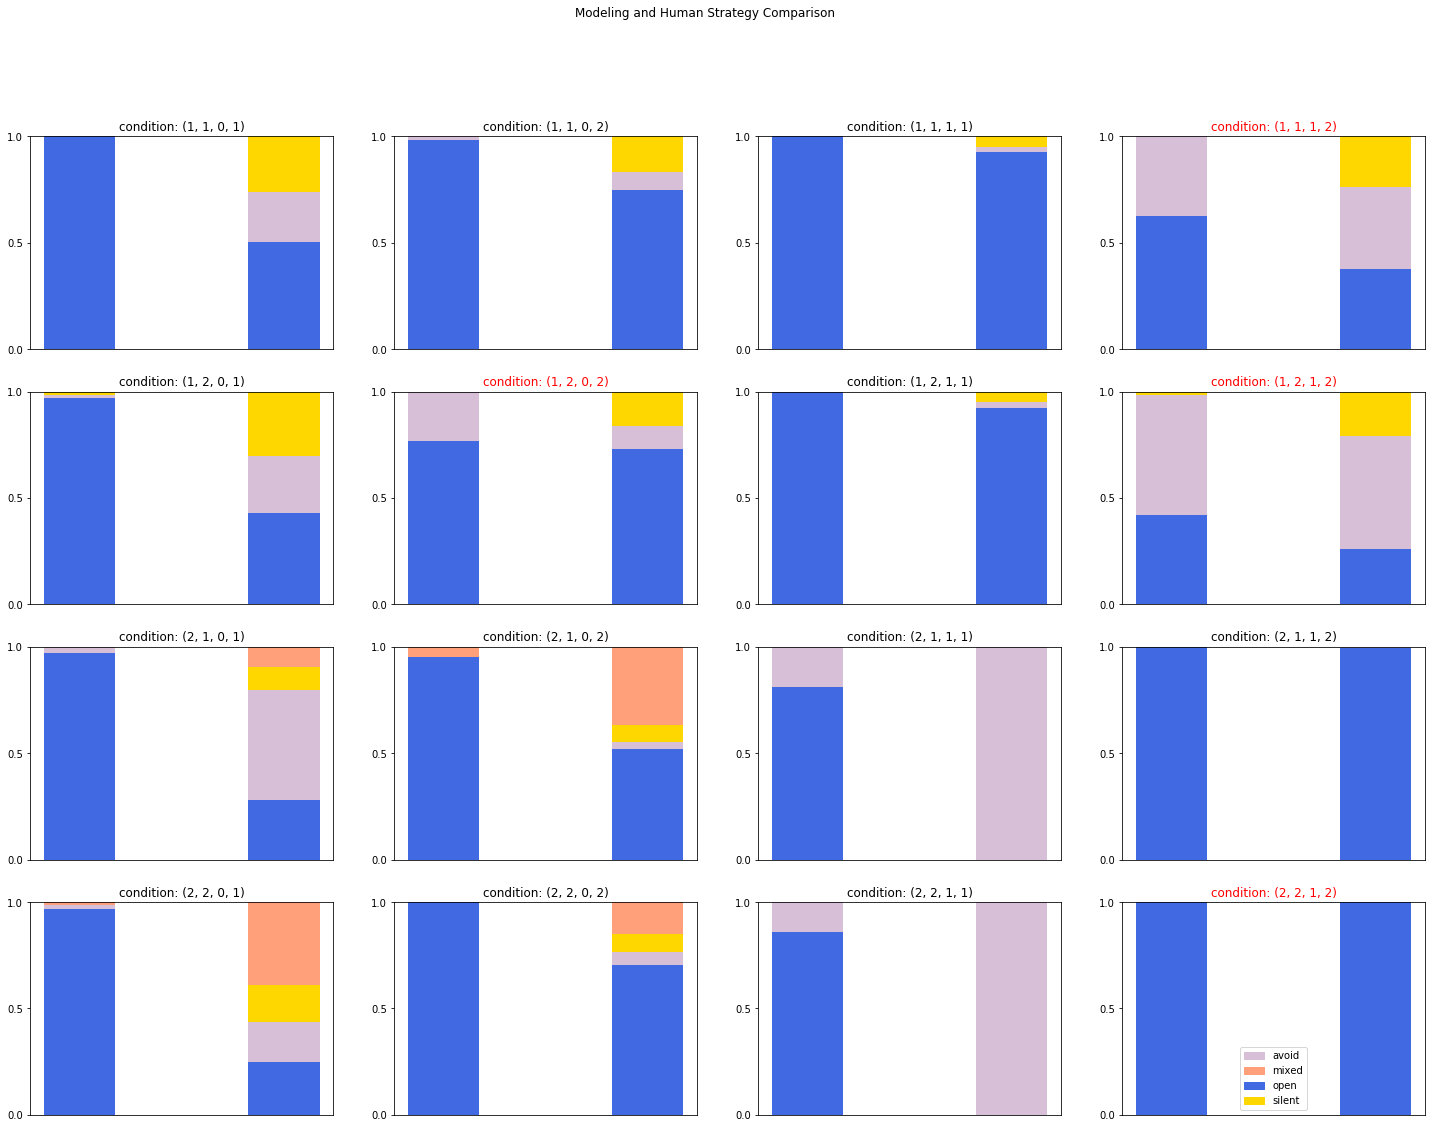

In [27]:
fig = plt.figure(figsize=figureSize)
numRows = dataFrameRowLength
numColumns = dataFrameColLength
plotCounter = 1

for condition, grp in dataframeName.groupby(['n_tokens','n_axes','show_imprints','n_bananas']):
    grp.index = grp.index.droplevel(['n_tokens','n_axes','show_imprints','n_bananas'])
    #for signalTypePriors, group in grp.groupby('signalTypePriors'):

    keyConditions = [(2,2,1,2),(1,2,1,2),(1,1,1,2),(1,2,0,2)] #2 token, inversion, one ax, wall
    #subplot axis labels
    axForDraw = fig.add_subplot(numRows, numColumns, plotCounter)
    axForDraw.set_title('condition: {}'.format(condition))
    if condition in keyConditions:
        axForDraw.set_title('condition: {}'.format(condition), color = 'red')
    axForDraw.set_ylim(0, 1)

    #draw subplot
    drawPerformanceBarPlot(grp, axForDraw, 2)

    plotCounter += 1

#Title
plt.suptitle('Modeling and Human Strategy Comparison')

#legend
legend_dict = legendColors
patchList = []
trialList = ["avoid", 'mixed', 'open', 'silent']
for key in trialList:
    data_key = mpatches.Patch(color=legend_dict[key], label=key)
    patchList.append(data_key)
plt.legend(handles=patchList, loc='best')

#adjust horizontal spacing of subplots
fig.subplots_adjust(wspace=.2)

plt.show()

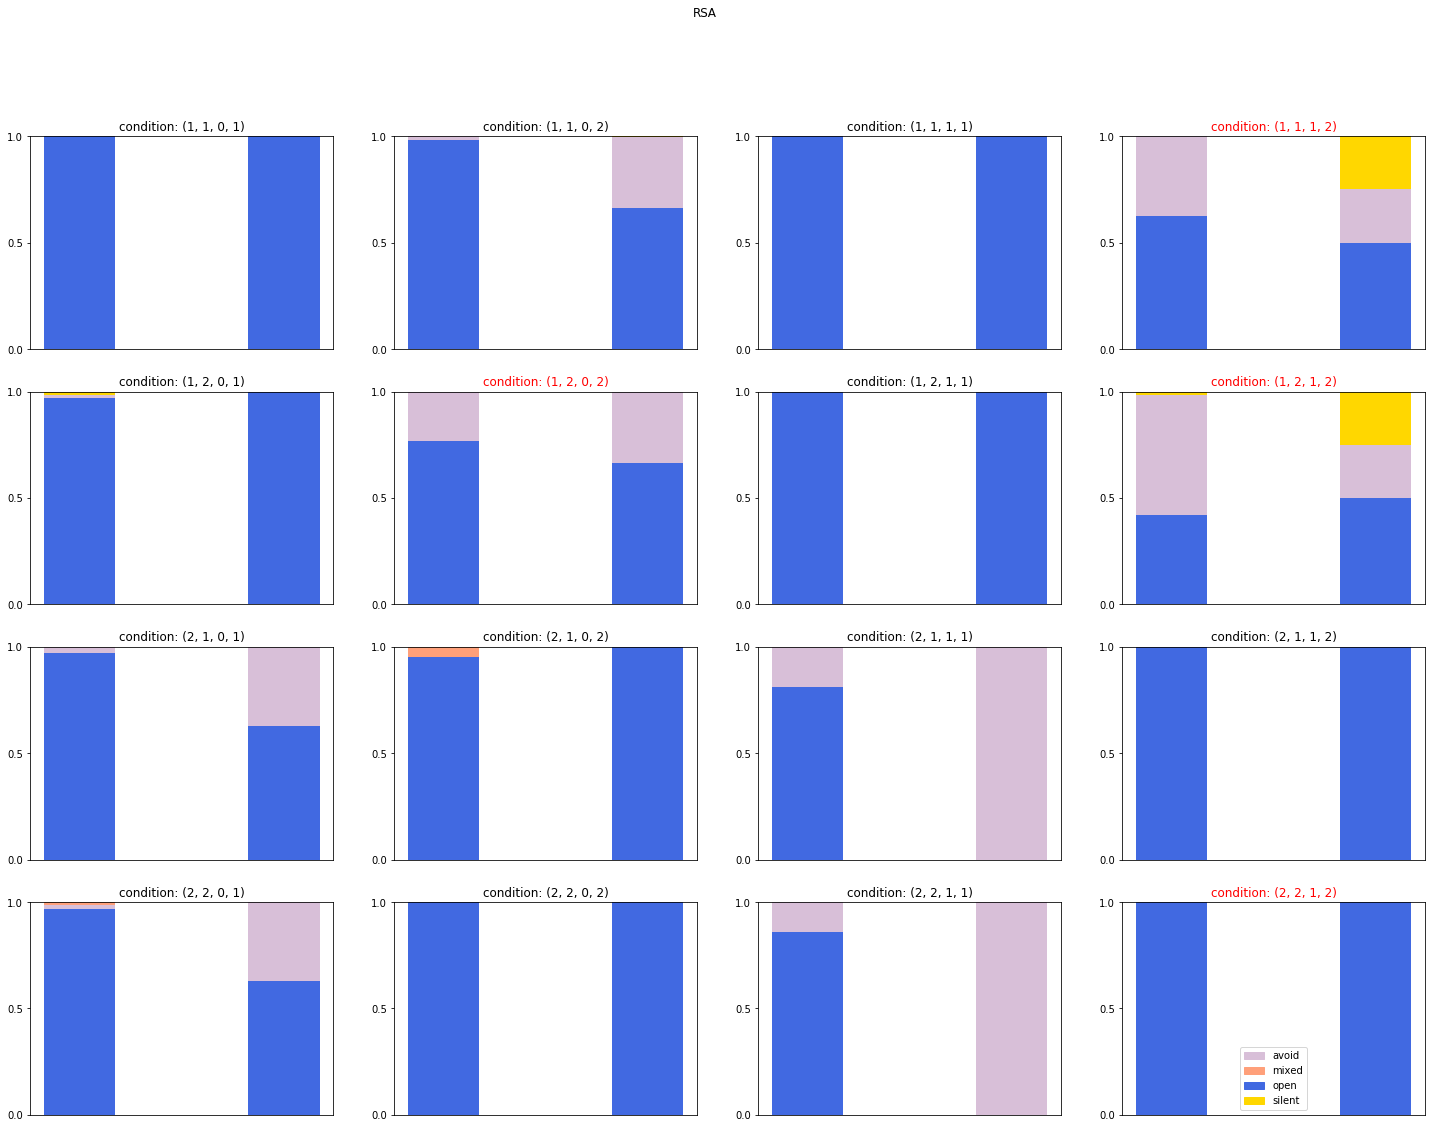

In [40]:
#dataframe to plot
dataframeName = modelPredictionsRSA
dataFrameRowLength = 4
dataFrameColLength = 4

fig = plt.figure(figsize=figureSize)
numRows = dataFrameRowLength
numColumns = dataFrameColLength
plotCounter = 1

for condition, grp in dataframeName.groupby(['n_tokens','n_axes','show_imprints','n_bananas']):
    grp.index = grp.index.droplevel(['n_tokens','n_axes','show_imprints','n_bananas'])
    #for signalTypePriors, group in grp.groupby('signalTypePriors'):

    keyConditions = [(2,2,1,2),(1,2,1,2),(1,1,1,2),(1,2,0,2)]
    #subplot axis labels
    axForDraw = fig.add_subplot(numRows, numColumns, plotCounter)
    axForDraw.set_title('condition: {}'.format(condition))
    if condition in keyConditions:
        axForDraw.set_title('condition: {}'.format(condition), color = 'red')
    axForDraw.set_ylim(0, 1)

    #draw subplot
    drawPerformanceBarPlot(grp, axForDraw, 2)

    plotCounter += 1

#Title
plt.suptitle('RSA')

#legend
legend_dict = legendColors
patchList = []
trialList = ["avoid", 'mixed', 'open', 'silent']
for key in trialList:
    data_key = mpatches.Patch(color=legend_dict[key], label=key)
    patchList.append(data_key)
plt.legend(handles=patchList, loc='best')

#adjust horizontal spacing of subplots
fig.subplots_adjust(wspace=.2)

plt.show()